In [7]:
# check gpu avalibility
!nvidia-smi

Mon Nov 13 19:50:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
## GPU then CPU
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-summary/news_summary_more.csv
/kaggle/input/news-summary/news_summary.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. EDA

  ## <span style="color:red">1.1 Import</span>

In [11]:
# import data
raw_train_df =  pd.read_csv("/kaggle/input/news-summary/news_summary.csv", encoding="latin-1")
raw_test_df  = pd.read_csv("/kaggle/input/news-summary/news_summary_more.csv", encoding="latin-1")

In [12]:
#show data
raw_train_df.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [13]:
raw_test_df.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [14]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     4514 non-null   object
 1   date       4514 non-null   object
 2   headlines  4514 non-null   object
 3   read_more  4514 non-null   object
 4   text       4514 non-null   object
 5   ctext      4396 non-null   object
dtypes: object(6)
memory usage: 211.7+ KB


In [15]:
raw_train_df.describe()

,author,date,headlines,read_more,text,ctext
count,4514,4514,4514,4514,4514,4396
unique,45,240,4514,4461,4514,4341
top,Chhavi Tyagi,"19 Jul 2017,Wednesday",Daman & Diu revokes mandatory Rakshabandhan in...,http://indiatoday.intoday.in/story/assembly-el...,The Administration of Union Territory Daman an...,AAJ TAK LIVE TV WITH LIVE ELECTION RESULTS I c...
freq,559,76,1,13,1,13


## confirm target

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='headlines', ylabel='count'>

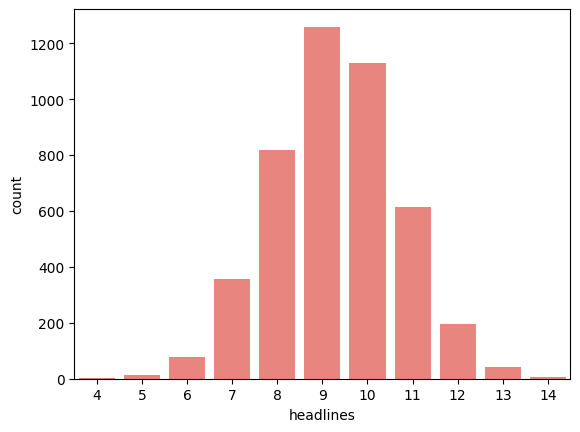

In [16]:
# word count distributioin for headlines
headlines_word_num = raw_train_df["headlines"].str.split().str.len()
sns.countplot(x = headlines_word_num, color="#F8766D")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='text', ylabel='count'>

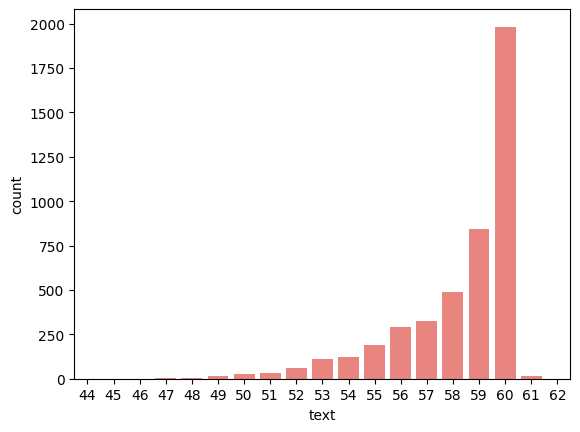

In [17]:
# word count distributioin for headlines
text_word_num = raw_train_df["text"].str.split().str.len()
sns.countplot(x = text_word_num, color="#F8766D")

In [18]:
# word count distributioin for ctext
ctext_word_num = raw_train_df["ctext"].str.split().str.len()
ctext_word_num.max(), ctext_word_num.min(), ctext_word_num.median()

(12202.0, 1.0, 283.0)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ctext', ylabel='Count'>

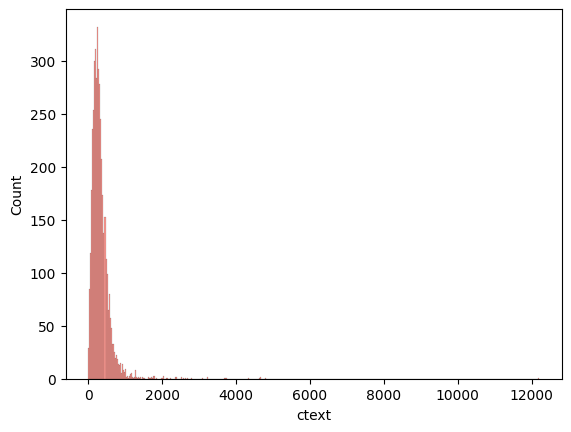

In [19]:
# log ctext_word_num
sns.histplot(x = ctext_word_num, color="#F8766D")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ctext', ylabel='Count'>

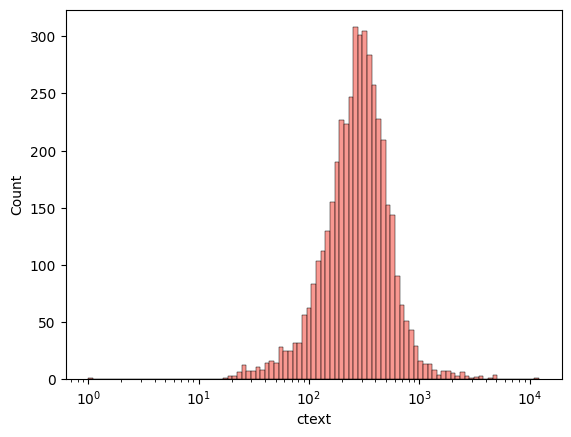

In [20]:
# log ctext_word_num
plt.xscale("log")
sns.histplot(x = ctext_word_num, color="#F8766D")

#### `text` is used as the target

  ## <span style="color:red"> 1.2 Missing Data </span>
 

In [21]:
missing = round(raw_train_df.isnull().mean(), 2)
missing

author       0.00
date         0.00
headlines    0.00
read_more    0.00
text         0.00
ctext        0.03
dtype: float64

<Axes: >

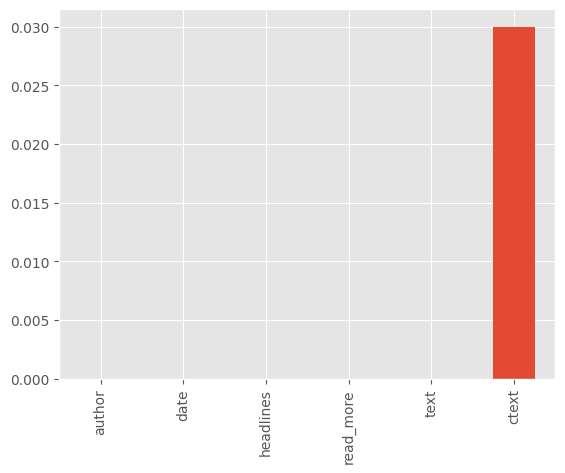

In [22]:
plt.style.use("ggplot")
missing.plot(kind = "bar")

  ## <span style="color:red"> 1.3 Check Duplication </span>

In [23]:
duplicates = raw_train_df[["headlines", "text", "ctext"]].apply(lambda col: col.duplicated().mean())
duplicates

headlines    0.000000
text         0.000000
ctext        0.038104
dtype: float64

<Axes: >

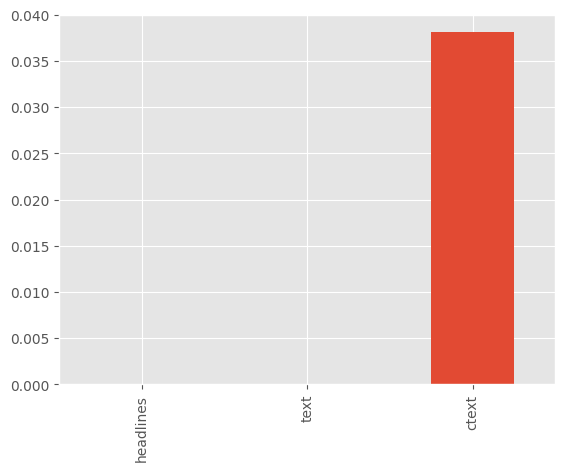

In [24]:
duplicates.plot(kind='bar')

## Get training data

In [25]:
#drop missing
temp_train_df  = raw_train_df.dropna(subset=["ctext"])[["headlines", "text", "ctext"]]
temp_train_df["article"] = temp_train_df["headlines"] + '. ' + temp_train_df["ctext"] 
temp_train_df.drop(columns=["headlines", "ctext"], inplace=True)
temp_train_df.rename(columns={"text":"summary"}, inplace=True)
train_df = temp_train_df[["article", "summary"]]
train_df.reset_index(inplace=True,drop=True)
train_df

,article,summary
0,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...
1,Malaika slams user who trolled her for 'divorc...,Malaika Arora slammed an Instagram user who tr...
2,'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...
3,Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotel staff to get training to spot signs of s...,Hotels in Maharashtra will train their staff t...
...,...,...
4391,Rasna seeking ?250 cr revenue from snack categ...,Fruit juice concentrate maker Rasna is eyeing ...
4392,Sachin attends Rajya Sabha after questions on ...,Former Indian cricketer Sachin Tendulkar atten...
4393,Shouldn't rob their childhood: Aamir on kids r...,"Aamir Khan, while talking about reality shows ..."
4394,"Asha Bhosle gets ?53,000 power bill for unused...",The Maharashtra government has initiated an in...


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  4396 non-null   object
 1   summary  4396 non-null   object
dtypes: object(2)
memory usage: 68.8+ KB


In [28]:
train_df.describe()

,article,summary
count,4396,4396
unique,4396,4396
top,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...
freq,1,1


In [29]:
# merge headlines and ctext as "article" and 'text' as summary 

## 

# Modeling

## Baseline Model

## Modeling with T5-small fine tunning

Tutorial:  
1. https://huggingface.co/docs/transformers/model_doc/t5
2. https://huggingface.co/docs/transformers/tasks/summarization

In [31]:
# !pip install datasets

In [32]:
import transformers
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModel
from torch.utils.data import DataLoader, random_split
import datasets
from datasets import Dataset, DatasetDict

## prepare inputs

### tokenization: convert text to token ids

In [35]:
# t5-small, t5-base, t5-large, t5-3b, t5-11b
model_name = "t5-small"
prefix =""
if model_name in ["t5-small", "t5-base", "t5-larg", "t5-3b", "t5-11b"]: 
    prefix="summarize: "

In [36]:
train_df["article"] = prefix + train_df["article"]
train_df

,article,summary
0,summarize: Daman & Diu revokes mandatory Raksh...,The Administration of Union Territory Daman an...
1,summarize: Malaika slams user who trolled her ...,Malaika Arora slammed an Instagram user who tr...
2,summarize: 'Virgin' now corrected to 'Unmarrie...,The Indira Gandhi Institute of Medical Science...
3,summarize: Aaj aapne pakad liya: LeT man Dujan...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,summarize: Hotel staff to get training to spot...,Hotels in Maharashtra will train their staff t...
...,...,...
4391,summarize: Rasna seeking ?250 cr revenue from ...,Fruit juice concentrate maker Rasna is eyeing ...
4392,summarize: Sachin attends Rajya Sabha after qu...,Former Indian cricketer Sachin Tendulkar atten...
4393,summarize: Shouldn't rob their childhood: Aami...,"Aamir Khan, while talking about reality shows ..."
4394,"summarize: Asha Bhosle gets ?53,000 power bill...",The Maharashtra government has initiated an in...


## Convert pandas DataFrame and split the data

In [37]:
# split into train, val, test
all_dataset = Dataset.from_pandas(train_df)
train_valtest= all_dataset.train_test_split(train_size=0.7, shuffle=True)
val_test = train_valtest["test"].train_test_split(train_size=0.5, shuffle=True)

train_val_test_dataset =  DatasetDict({
    'train': train_valtest['train'],
    'test': val_test['test'],
    'val': val_test['train']})

/opt/conda/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [38]:
print(type(train_val_test_dataset))
train_val_test_dataset

<class 'datasets.dataset_dict.DatasetDict'>


DatasetDict({
    train: Dataset({
        features: ['article', 'summary'],
        num_rows: 3077
    })
    test: Dataset({
        features: ['article', 'summary'],
        num_rows: 660
    })
    val: Dataset({
        features: ['article', 'summary'],
        num_rows: 659
    })
})

In [39]:
train_val_test_dataset["train"]

Dataset({
    features: ['article', 'summary'],
    num_rows: 3077
})

In [40]:
train_val_test_dataset["train"]["article"][:1]

["summarize: Beef festival organised in Aizawl as Rajnath visits Mizoram. Opposing the recent notification of the Centre banning sale of cattle for slaughter in animal markets, which is being widely perceived as beef ban, some activists today organised a beef festival in Mizoram capital Aizawl. The beef festival coincides with the visit of Union Home Minister Rajnath Singh, who arrived in Aizawl today to hold a meeting of chief ministers of the states sharing borders with Mynamar.The security arrangement for Rajnath Singh's visit to Aizawl was beefed up in the wake of beef festival organised by ZOlife Group and some activists. The organisers promoted the event on Facebook asking people to attend the beef festival at Vanapa Hall in Aizawl. It was scheduled for 2 pm today.CAUSE OF CONCERN FOR BJPThe opposition to the Centre's notification assumes political significance for the BJP, which is focusing on improving its presence in the entire North-East. Remruata Varte, one of the organizers

In [41]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [42]:
def preprocess(data_set):
    inputs = data_set["article"]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    labels = tokenizer(text_target=data_set["summary"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs

## tokenize

In [43]:
 tokenized_data = train_val_test_dataset.map(preprocess, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [44]:
tokenized_data["train"]

Dataset({
    features: ['article', 'summary', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 3077
})

## padding

In [45]:
# padding to the maximum length
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model_name)

## set evaluation metirc: rouge

In [46]:
# !pip install evaluate
#!pip install rouge_score
import evaluate
import numpy as np

In [47]:
rouge = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

## set up the model

In [48]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [49]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


## set up essential parameters

In [55]:
training_args = Seq2SeqTrainingArguments(
    output_dir="news_summary_T5_small",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=4,
    predict_with_generate=True,
    fp16=True,
    optim=, 
    report_to="none"   # set to 'none'; otherwise you need to login WANDB
)

In [56]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["val"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

## finetune with train()

In [57]:
trainer.train()

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,No log,1.837026,0.249200,0.133400,0.211700,0.211800,18.993900
2,No log,1.797563,0.252200,0.135900,0.213600,0.213700,18.993900
3,1.979600,1.783870,0.252800,0.136700,0.213900,0.213800,18.993900
4,1.979600,1.778750,0.252800,0.136200,0.213100,0.213200,18.993900


/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=772, training_loss=1.9514486678523721, metrics={'train_runtime': 761.1334, 'train_samples_per_second': 16.171, 'train_steps_per_second': 1.014, 'total_flos': 3149241944506368.0, 'train_loss': 1.9514486678523721, 'epoch': 4.0})

## Inference

In [ ]:
text = """summarize: The full cost of damage in Newton Stewart, one of the areas worst affected, is still being assessed.\nRepair work is ongoing in Hawick and many roads in Peeblesshire remain badly affected by standing water.\nTrains on the west coast mainline face disruption due to damage at the Lamington Viaduct.\nMany businesses and householders were affected by flooding in Newton Stewart after the River Cree overflowed into the town.\nFirst Minister Nicola Sturgeon visited the area to inspect the damage.\nThe waters breached a retaining wall, flooding many commercial properties on Victoria Street - the main shopping thoroughfare.\nJeanette Tate, who owns the Cinnamon Cafe which was badly affected, said she could not fault the multi-agency response once the flood hit.\nHowever, she said more preventative work could have been carried out to ensure the retaining wall did not fail.\n"It is difficult but I do think there is so much publicity for Dumfries and the Nith - and I totally appreciate that - but it is almost like we\'re neglected or forgotten," she said.\n"That may not be true but it is perhaps my perspective over the last few days.\n"Why were you not ready to help us a bit more when the warning and the alarm alerts had gone out?"\nMeanwhile, a flood alert remains in place across the Borders because of the constant rain.\nPeebles was badly hit by problems, sparking calls to introduce more defences in the area.\nScottish Borders Council has put a list on its website of the roads worst affected and drivers have been urged not to ignore closure signs.\nThe Labour Party\'s deputy Scottish leader Alex Rowley was in Hawick on Monday to see the situation first hand.\nHe said it was important to get the flood protection plan right but backed calls to speed up the process.\n"I was quite taken aback by the amount of damage that has been done," he said.\n"Obviously it is heart-breaking for people who have been forced out of their homes and the impact on businesses."\nHe said it was important that "immediate steps" were taken to protect the areas most vulnerable and a clear timetable put in place for flood prevention plans.\nHave you been affected by flooding in Dumfries and Galloway or the Borders? Tell us about your experience of the situation and how it was handled. Email us on selkirk.news@bbc.co.uk or dumfries@bbc.co.uk.A fire alarm went off at the Holiday Inn in Hope Street at about 04:20 BST on Saturday and guests were asked to leave the hotel.\nAs they gathered outside they saw the two buses, parked side-by-side in the car park, engulfed by flames.\nOne of the tour groups is from Germany, the other from China and Taiwan. It was their first night in Northern Ireland.\nThe driver of one of the buses said many of the passengers had left personal belongings on board and these had been destroyed.\nBoth groups have organised replacement coaches and will begin their tour of the north coast later than they had planned.\nPolice have appealed for information about the attack.\nInsp David Gibson said: "It appears as though the fire started under one of the buses before spreading to the second.\n"While the exact cause is still under investigation, it is thought that the fire was started deliberately."""
std_summary = "Clean-up operations are continuing across the Scottish Borders and Dumfries and Galloway after flooding caused by Storm Frank."

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization", model="/kaggle/working/news_summary_T5_small")


In [ ]:
summarizer(text)